In [7]:
import numpy as np
import pandas as pd
import arviz as az
from scipy.stats import ks_2samp

# from src.mcmc.rwm import RWM
from src.mcmc.mala import MALA
from src.mcmc.barker import Barker
from src.mcmc.smmala import SMMALA
from src.mcmc.smbarker import SMBarker

from src.dist.rosenbrock import Rosenbrock
from src.dist.generalised_normal import SmoothedGeneralNormal

from src.utils.plot import traceplot, acfplot, pairplot

In [8]:
def ess(X, rosenbrock):
    idx = ['X_{1}']

    for j in range(1, rosenbrock.n2+1):
        for i in range(2, rosenbrock.n1+1):
            idx.append(f'X_{{{j},{i}}}')

    print('Effective Sample Size')

    for i in range(X.shape[0]):
        print('\t', idx[i], ': ', az.ess(X[i, :]))


def quantiles(X_mcmc, rosenbrock):
    quantiles = (0.025, 0.25, 0.5, 0.75, 0.975)

    idx = ['X_{1}']

    for j in range(1, rosenbrock.n2+1):
        for i in range(2, rosenbrock.n1+1):
            idx.append(f'X_{{{j},{i}}}')

    X_true = rosenbrock.sample(size=X_mcmc.shape[1])

    df = pd.DataFrame(columns=['0.025', '0.25', '0.5', '0.75', '0.975'])

    for i in range(X_true.shape[0]):
        df.loc['True ' + idx[i]] = np.quantile(X_true[i, :], quantiles)
        df.loc['MCMC ' + idx[i]] = np.quantile(X_mcmc[i, :], quantiles)

    return df


def ks_distance(X_mcmc, rosenbrock):    
    idx = ['X_{1}']

    for j in range(1, rosenbrock.n2+1):
        for i in range(2, rosenbrock.n1+1):
            idx.append(f'X_{{{j},{i}}}')

    X_true = rosenbrock.sample(size=X_mcmc.shape[1])

    ks, _ = ks_2samp(X_mcmc, X_true, axis=1)
    
    print('Kolmogorov-Smirnov Distance')

    for i in range(len(ks)):
        print('\t', idx[i], ': ', ks[i])

SMBarker acceptance rate: 0.60679


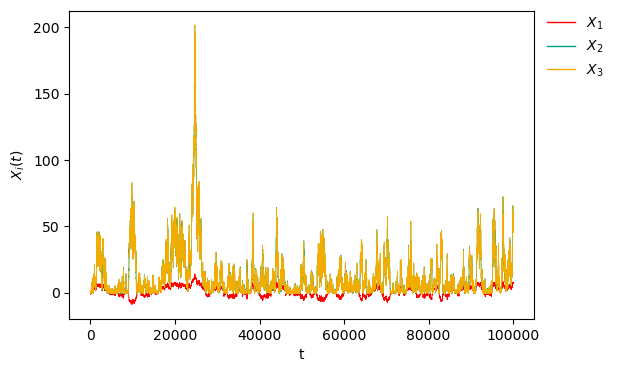

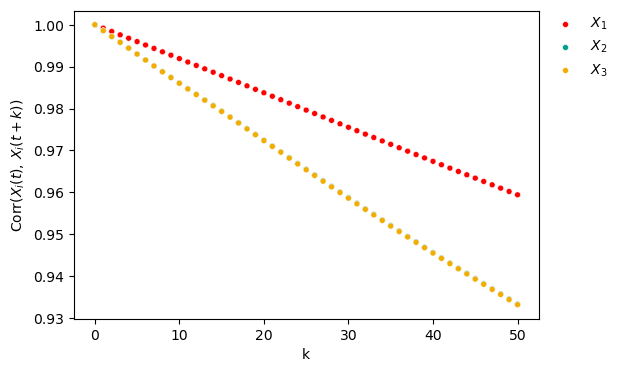

Effective Sample Size
	 X_{1} :  28.12864342530996
	 X_{1,2} :  76.33735715974
	 X_{2,2} :  77.32430724679297
Kolmogorov-Smirnov Distance
	 X_{1} :  0.02889
	 X_{1,2} :  0.032840000000000036
	 X_{2,2} :  0.032320000000000015


,0.025,0.25,0.5,0.75,0.975
True X_{1},-5.166132,-1.149452,0.997094,3.133985,7.157201
MCMC X_{1},-5.612759,-1.390126,0.922009,3.064944,7.176208
"True X_{1,2}",-0.200585,1.162942,5.039440,14.603357,54.508381
"MCMC X_{1,2}",-0.199419,1.298881,5.564937,14.771341,53.488288
"True X_{2,2}",-0.188899,1.159411,5.043974,14.598266,54.506536
"MCMC X_{2,2}",-0.199756,1.284504,5.582116,14.815043,53.607934


In [26]:
N1 = 2
N2 = 2
X_INIT = [0, 0, 0]
N_ITER = 100000

target = Rosenbrock(n1=N1, n2=N2)

X_smmala, accept_rate = SMMALA(
    target=target,
    n_iter=N_ITER,
    x_init=X_INIT,
    step_size=0.6,
    method='abs',
)
print(f'SMMALA acceptance rate: {accept_rate}')

traceplot(X_smmala)
acfplot(X_smmala)

ess(X_smmala, target)

ks_distance(X_smmala, target)

quantiles(X_smmala, target)

SMMALA acceptance rate: 0.57818


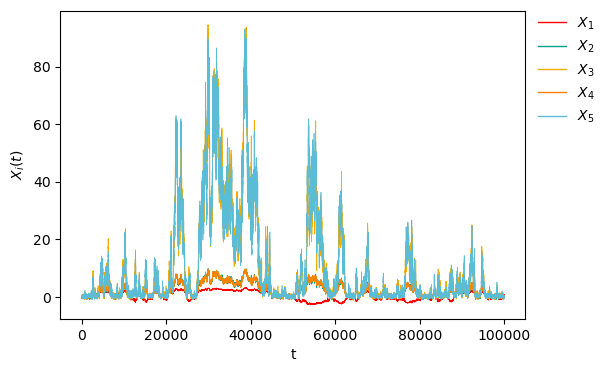

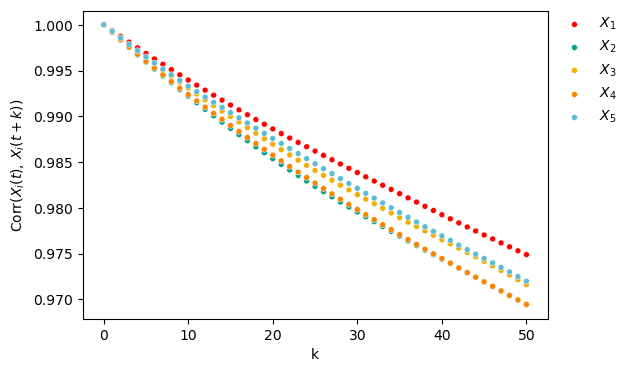

Effective Sample Size
	 X_{1} :  2.5415441272386348
	 X_{1,2} :  17.349553025824296
	 X_{1,3} :  17.256374055990726
	 X_{2,2} :  17.436628592613246
	 X_{2,3} :  17.18068724721225
Kolmogorov-Smirnov Distance
	 X_{1} :  0.26061
	 X_{1,2} :  0.38283999999999996
	 X_{1,3} :  0.38287000000000004
	 X_{2,2} :  0.38366
	 X_{2,3} :  0.38389000000000006


,0.025,0.25,0.5,0.75,0.975
True X_{1},-5.213337,-1.141374,0.999854,3.132300,7.219482
MCMC X_{1},-2.314534,-0.742242,0.541819,1.544685,2.778825
"True X_{1,2}",-0.206308,1.156927,5.047797,14.519804,55.176490
"MCMC X_{1,2}",-0.286323,0.443383,1.477562,3.630317,7.659768
"True X_{1,3}",-0.258729,1.361007,25.522964,210.837731,3044.703525
"MCMC X_{1,3}",-0.392977,0.313253,2.214694,13.143497,58.632510
"True X_{2,2}",-0.197846,1.145944,5.059679,14.524069,55.231080
"MCMC X_{2,2}",-0.300251,0.456789,1.462966,3.560420,7.677543
"True X_{2,3}",-0.253102,1.337766,25.607608,211.065567,3050.226906
"MCMC X_{2,3}",-0.350889,0.325455,2.144034,12.673211,58.983770


In [37]:
N1 = 3
N2 = 2
X_INIT = [0, 0, 0, 0, 0]
N_ITER = 100000

target = Rosenbrock(n1=N1, n2=N2)

X_smmala, accept_rate = SMMALA(
    target=target,
    n_iter=N_ITER,
    x_init=X_INIT,
    step_size=0.35,
    method='abs',
)
print(f'SMMALA acceptance rate: {accept_rate}')

traceplot(X_smmala)
acfplot(X_smmala)

ess(X_smmala, target)

ks_distance(X_smmala, target)

quantiles(X_smmala, target)

In [94]:
def RWM_proposal(x, step_size):
    return x + step_size * np.random.normal(size=x.shape[0])


def RWM(target, n_iter, x_init, step_size=1):
    target_acceptance = 0.234
    burn_in = 5000
    L = 50
    learning_rate = 0.1
    
    x = np.asarray(x_init)
    logpi_x = target.logpi(x)

    # (#components, #iterations)
    X = np.empty((x.shape[0], n_iter))

    accepted = list()

    # accepted = 0
    for i in range(burn_in):
        y = RWM_proposal(x, step_size)

        logpi_y = target.logpi(y)

        log_acceptance = logpi_y - logpi_x

        # Acceptance criterion
        if np.log(np.random.uniform(size=1)) < log_acceptance:
            x = y
            logpi_x = logpi_y
            # accepted += 1
            accepted.append(1)
        else:
            accepted.append(0)

        accept_prob = min(1, np.exp(log_acceptance))
        
        recent_accepts = accepted[-L:]
        accept_rate = sum(recent_accepts) / len(recent_accepts)

        step_size *= np.exp(learning_rate * (accept_prob - target_acceptance) * (1 + np.sqrt(np.abs(accept_rate - target_acceptance))))

        # OPTION 3: 
        # if (i + 1) % L == 0:
        #     accept_rate = accepted / L

        #     diff = accept_rate - target_acceptance

        #     if abs(diff) >= 0.05:
        #         step_size *= np.exp(learning_rate * diff * (1 + (abs(diff))))

        #     accepted = 0

            # OPTION 1: Bounds
            # if accept_rate > (target_acceptance + 0.05):
            #     step_size += 0.01
            # elif accept_rate < (target_acceptance - 0.05):
            #     step_size -= -0.01
        
        # OPTION 2: AM with adaptive scaling
        # acceptance_prob = min(1, np.exp(log_acceptance))
        # step_size = np.exp(np.log(step_size) + learning_rate * (acceptance_prob - target_acceptance))

    accepted = 0
    for i in range(n_iter):
        # Proposal state
        y = RWM_proposal(x, step_size)

        logpi_y = target.logpi(y)

        # Log RWM acceptance rate
        log_acceptance = logpi_y - logpi_x

        # Acceptance criterion
        if np.log(np.random.uniform(size=1)) < log_acceptance:
            x = y
            logpi_x = logpi_y
            accepted += 1

        X[:, i] = x

    acceptance_rate = accepted / n_iter

    return X, acceptance_rate

0.22277


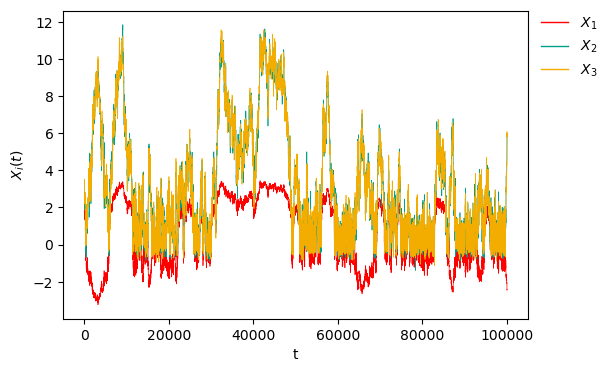

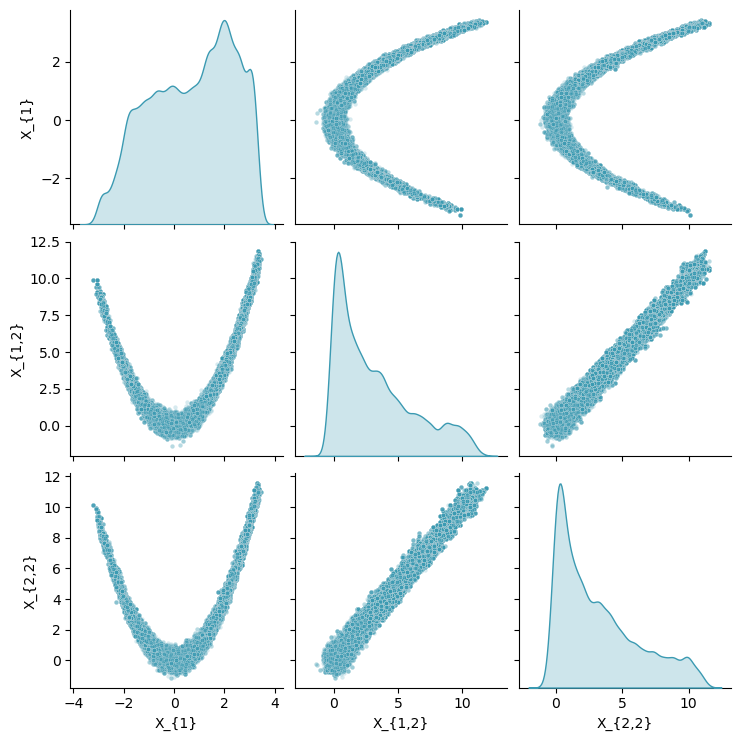

In [109]:
target = Rosenbrock(n1=2, n2=2)
X_rwm, accept_rate = RWM(target, 100000, x_init=[0, 0, 0])

print(accept_rate)
traceplot(X_rwm)
pairplot(X_rwm, target.n1, target.n2)

0.19789


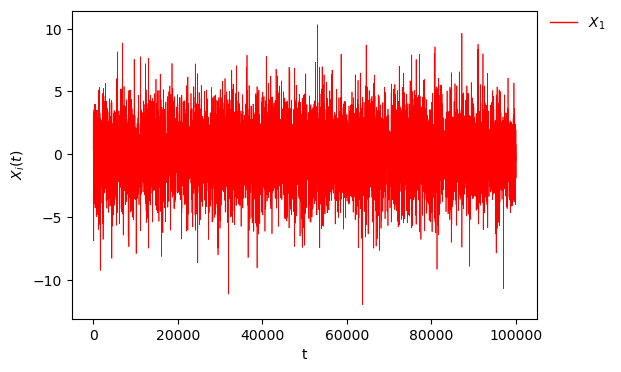

In [102]:
target = SmoothedGeneralNormal(beta=1)

X_rwm, accept_rate = RWM(target, 100000, x_init=[0])
print(accept_rate)
traceplot(X_rwm)